https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

# Ejercicio Regression Tree
Son datos de temperaturas tomados de la ciudad de Seattle. El objetivo es intentar predecir lo mejor posible la máxima temperatura (columna `actual`) que alcanzaremos al día siguiente. Para ello contaremos con temperaturas de los dos días anteriores, históricos de máximas temperaturas y un amigo bastante chapas que te da su predicción del tiempo cada día.

**Resumen de datos**:
* year: 2016 for all data points
* month: number for month of the year
* day: number for day of the year
* week: day of the week as a character string
* temp_2: max temperature 2 days prior
* temp_1: max temperature 1 day prior
* average: historical average max temperature
* actual: max temperature measurement
* friend: your friend’s prediction, a random number between 20 below the average and 20 above the average


### 1. Importa el csv "temps.csv"

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('temps.csv')
df.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


### 2. Lidia con las variables categóricas del dataset

In [3]:
df = pd.get_dummies(df)
df.head(3)

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,45,43,50,44,29,1,0,0,0,0,0,0
1,2016,1,2,44,45,45.7,44,41,50,44,61,0,0,1,0,0,0,0
2,2016,1,3,45,44,45.8,41,43,46,47,56,0,0,0,1,0,0,0


### 3. Divide en train y test

In [4]:
import numpy as np
from sklearn.model_selection import train_test_split

X = np.array(df.drop('actual', axis=1))
y = np.array(df.actual)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

### 4. Entrena el modelo
Utiliza un DecisionTreeRegressor

In [15]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

### 5. Calcula su MAE
Sin usar sklearn

In [16]:
def mean_absolute_error(y_predict, y_test):
    return sum(abs(y_predict - y_test))/len(y_test)

y_pred_train = dtr.predict(X_train)
y_pred_test = dtr.predict(X_test)

print('Train MAE:', mean_absolute_error(y_pred_train, y_train))
print('Test MAE:', mean_absolute_error(y_pred_test, y_test))

Train MAE: 0.0
Test MAE: 4.828571428571428


### 6. Calcula su MAPE
Sin usar sklearn

In [17]:
print('Train MAPE:', (mean_absolute_error(y_pred_train, y_train)*100)/len(y_train))
print('Test MAPE:', (mean_absolute_error(y_pred_test, y_test)*100)/len(y_test))

Train MAPE: 0.0
Test MAPE: 6.897959183673469


### 7. Representa el árbol de decision

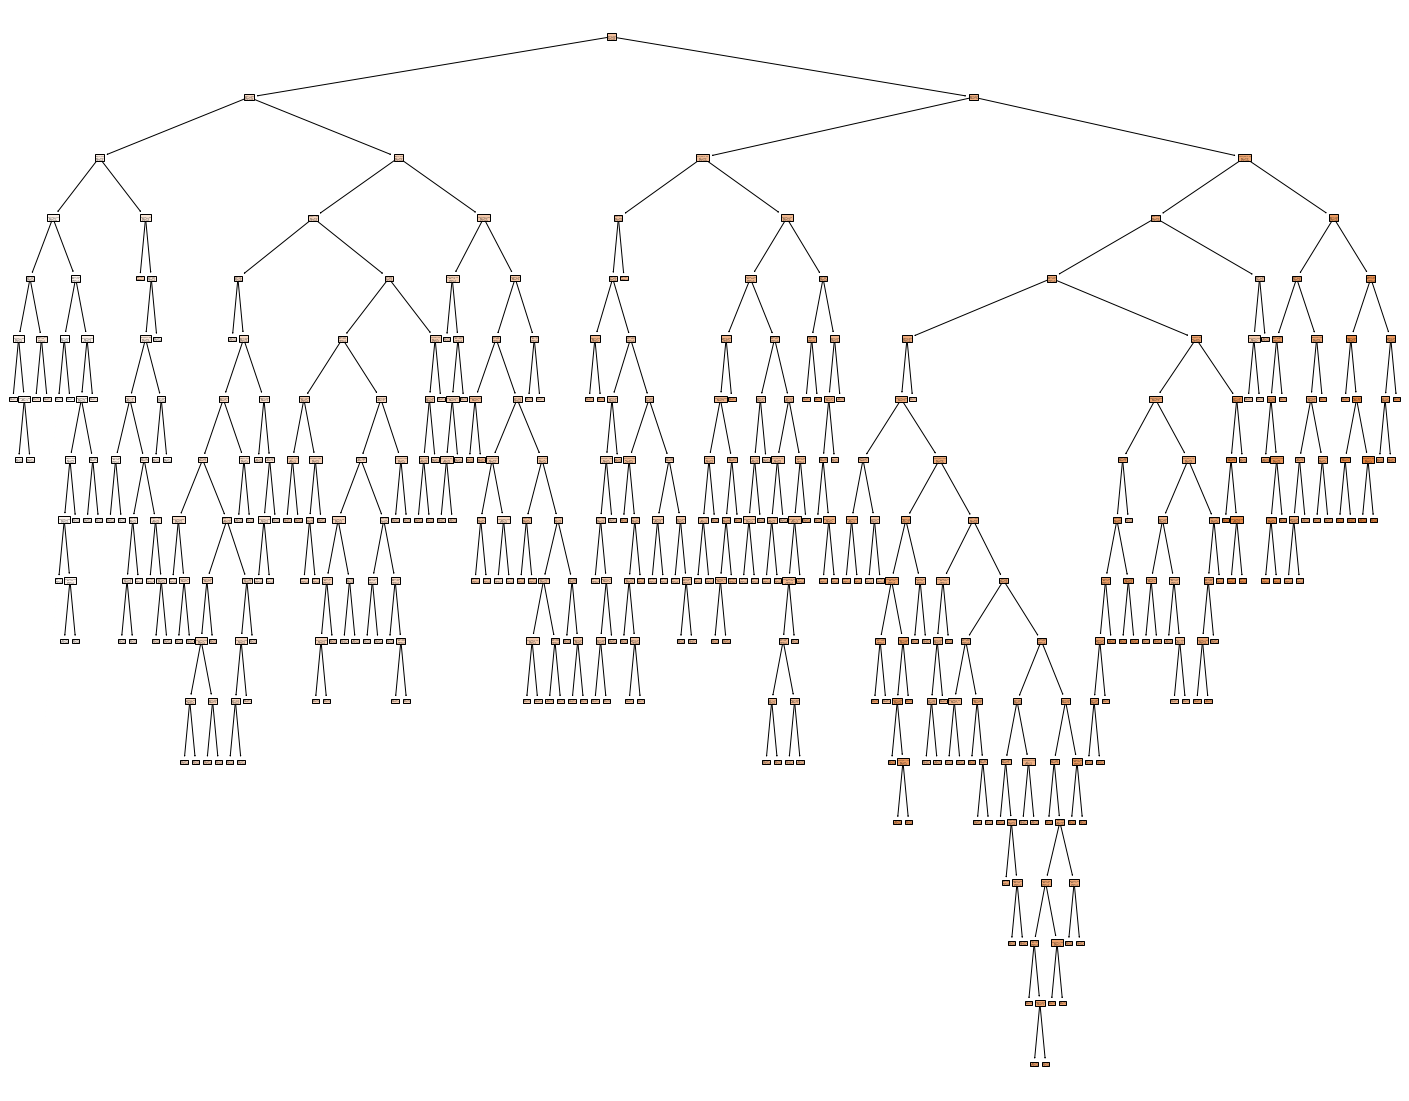

In [19]:
from sklearn import tree
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtr, 
                   feature_names=X.columns,  
                   class_names="actual",
                   filled=True)

### 8. Modifica el max_depth a 3 y vuelve a entrenarlo

In [20]:
dtr3 = DecisionTreeRegressor(max_depth=3)
dtr3.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

### 9. Vuelve a calcular si MAE

In [21]:
y_pred_train3 = dtr3.predict(X_train)
y_pred_test3 = dtr3.predict(X_test)

print('Train MAE_3:', mean_absolute_error(y_pred_train3, y_train))
print('Test MAE_3:', mean_absolute_error(y_pred_test3, y_test))

Train MAE_3: 3.64824877747553
Test MAE_3: 4.55671962657425


### 10. Vuelve a representar su árbol

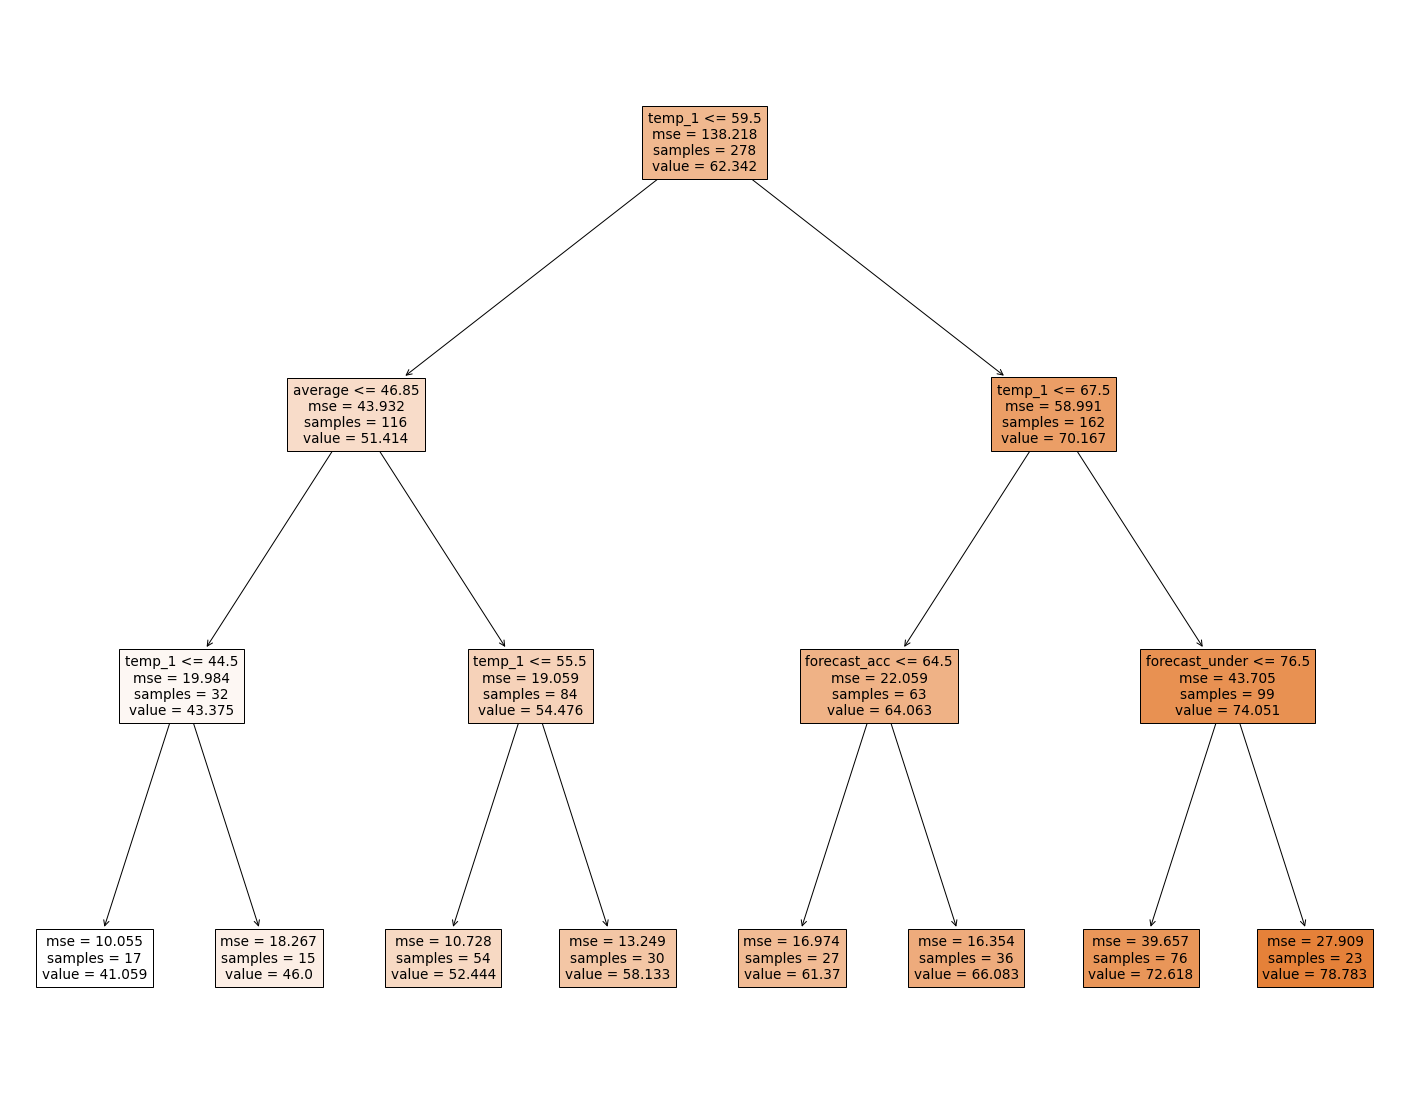

In [22]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtr3, 
                   feature_names=X.columns,  
                   class_names="actual",
                   filled=True)

### 10. Obten el `feature_importances` de cada variable en el último modelo

In [23]:
dtr3.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.88020751,
       0.08841159, 0.        , 0.01060993, 0.02077097, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        ])

In [25]:
# Get features list
feature_list = list(df.columns)
# Get numerical feature importances
importances = list(dtr3.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: temp_1               Importance: 0.88
Variable: average              Importance: 0.09
Variable: forecast_acc         Importance: 0.02
Variable: forecast_noaa        Importance: 0.01
Variable: year                 Importance: 0.0
Variable: month                Importance: 0.0
Variable: day                  Importance: 0.0
Variable: temp_2               Importance: 0.0
Variable: actual               Importance: 0.0
Variable: forecast_under       Importance: 0.0
Variable: friend               Importance: 0.0
Variable: week_Fri             Importance: 0.0
Variable: week_Mon             Importance: 0.0
Variable: week_Sat             Importance: 0.0
Variable: week_Sun             Importance: 0.0
Variable: week_Thurs           Importance: 0.0
Variable: week_Tues            Importance: 0.0


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]